In [ ]:
import pandas as pd

In [ ]:
#installing the libraries:

import pandas as pd
import numpy as np
from glob import glob
import glob2
from tqdm import tqdm
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import warnings
from joblib import Parallel, delayed
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_recall_curve,average_precision_score,accuracy_score

In [ ]:
import tensorflow as tf
import keras
# tf.enable_eager_execution()
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# from hilbert import hilbertCurve
import imgaug.augmenters as iaa
import numpy as np
import random as rn
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, Callback
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# import tensorflow.keras.applications.efficientnet as efn
from tensorflow.keras import Sequential
from keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import densenet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, AveragePooling2D

from tensorflow import reduce_sum
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPool2D, Dropout, concatenate, Flatten
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [ ]:
from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
#from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.preprocessing.image import ImageDataGenerator

import glob
import shutil
import os
import random
from PIL import Image

In [ ]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue May 31 00:24:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
final_train_df = pd.read_csv('/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Data/Files/Label.csv')

In [ ]:
final_train_df['Target'] = final_train_df[' EncodedPixels'].apply(lambda x : 0 if x == 'No Pneumothorax' else 1)
final_train_df.head(2)

,ImageId,EncodedPixels,Target
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,No Pneumothorax,0
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,Pneumothorax,1


In [ ]:
#Saving the JPEG image paths in the Train Dataframe :

final_train_df['ImagePath_Png'] = '/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Data/Files/PNG Images/Images/'+ final_train_df['ImageId']+'.jpg'
final_train_df.head(5)

,ImageId,EncodedPixels,Target,ImagePath_Png
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,No Pneumothorax,0,/content/drive/MyDrive/Deep Learning Project/N...
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,Pneumothorax,1,/content/drive/MyDrive/Deep Learning Project/N...
2,1.2.276.0.7230010.3.1.4.8323329.11028.15178752...,No Pneumothorax,0,/content/drive/MyDrive/Deep Learning Project/N...
3,1.2.276.0.7230010.3.1.4.8323329.10366.15178752...,Pneumothorax,1,/content/drive/MyDrive/Deep Learning Project/N...
4,1.2.276.0.7230010.3.1.4.8323329.10016.15178752...,Pneumothorax,1,/content/drive/MyDrive/Deep Learning Project/N...


In [ ]:
imagePath_train = final_train_df['ImagePath_Png']

In [ ]:
# Getting the labels :
labels = final_train_df["Target"]

In [ ]:
labels.shape

(12047,)

In [ ]:
trainPath, validPath, trainLabels, validLabels = train_test_split(imagePath_train, labels, test_size = 0.1, random_state = 27, stratify=labels)

In [ ]:
print('Total Train Dataset Size : ', trainPath.shape[0])
print('Total Valid Dataset Size : ', validPath.shape[0])

Total Train Dataset Size :  10842
Total Valid Dataset Size :  1205


In [ ]:
#Getting the count of the records present in train and cv dataset:
trainCount=trainLabels.value_counts()
validCount = validLabels.value_counts()

In [ ]:
#Getting the count of individual classes:

totalTrainCount = trainLabels.shape[0]
totalPosCount = trainCount[1]
totalNegCount = trainCount[0]

print('Total Train Labels : ', totalTrainCount)
print('Total Train Positive Labels : ', totalPosCount)
print('Total Train Negative Labels : ', totalNegCount)

Total Train Labels :  10842
Total Train Positive Labels :  2402
Total Train Negative Labels :  8440


In [ ]:
VtotalTrainCount = validLabels.shape[0]
vtotalPosCount = validCount[1]
vtotalNegCount = validCount[0]

print('Total Train Labels : ', VtotalTrainCount)
print('Total Train Positive Labels : ', vtotalPosCount)
print('Total Train Negative Labels : ', vtotalNegCount)

Total Train Labels :  1205
Total Train Positive Labels :  267
Total Train Negative Labels :  938


In [ ]:
#Finding the frequency of each class: Freq = count_of_class/total_records_present

posFreq = round((totalPosCount/totalTrainCount),2)
negFreq = round((totalNegCount/totalTrainCount),2)

print('Frequency Of Positive Class : ', posFreq)
print('Frequency Of Negataive Class : ', negFreq)

Frequency Of Positive Class :  0.22
Frequency Of Negataive Class :  0.78


In [ ]:
#Assigning the weights of each class :

pos_weights = negFreq
neg_weights = posFreq

In [ ]:
#Getting the contribution of individual class :

pos_contribution = posFreq * pos_weights
neg_contribution = negFreq * neg_weights

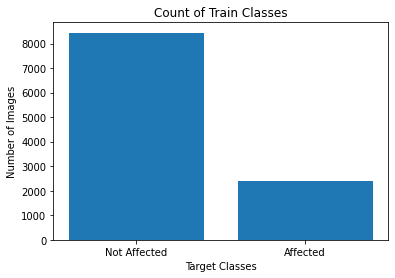

In [ ]:
#Plotting the count of individual class:

classes = ['Not Affected', 'Affected']
count = [totalNegCount,totalPosCount]
plt.bar(classes,count)
plt.xlabel('Target Classes')
plt.ylabel('Number of Images')
plt.title('Count of Train Classes')
plt.show()

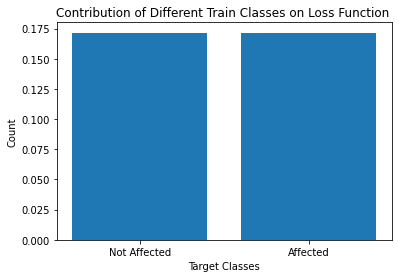

In [ ]:
#Plotting the contribution of each class after assigning the class weights:

classes = ['Not Affected', 'Affected']
count = [neg_contribution,pos_contribution]
plt.bar(classes,count)
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Contribution of Different Train Classes on Loss Function ')
plt.show()

In [ ]:
import random

In [ ]:
def build_decoder(with_labels=True, target_size=(300, 300)):
    def decode(path):
        file_bytes = tf.io.read_file(path)
        img = tf.image.decode_png(file_bytes, channels=3)
        img = tf.cast(img, tf.float32) / 255.0
        img = tf.image.resize(img, target_size)

        return img

    def decode_with_labels(path, label):
        return decode(path), label

    return decode_with_labels if with_labels else decode

def build_augmenter(with_labels=True):
    def augment(img):
        number = random.randint(1,5)
        seed = (1, 5)
        if number == 1:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_contrast(img,0.2, 0.5,seed)
        if number == 2:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_brightness(img, 0.2,seed)
        if number == 3:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.stateless_random_saturation(img, 0.2, 0.5,seed)
        if number == 4:
            img = tf.image.stateless_random_flip_up_down(img,seed)
            img = tf.image.stateless_random_hue(img, 0.2,seed)
        if number == 5:
            img = tf.image.stateless_random_flip_left_right(img,seed)
            img = tf.image.adjust_gamma(img, 0.2)
        return img

    def augment_with_labels(img, label):
        return augment(img), label

    return augment_with_labels if with_labels else augment

def build_dataset(paths, labels=None, bsize=32, cache=True,
                  decode_fn=None, augment_fn=None,
                  augment=True, repeat=True, shuffle=1024,cache_dir=""):
    if cache_dir != "" and cache is True:
        os.makedirs(cache_dir, exist_ok=True)

    if decode_fn is None:
        decode_fn = build_decoder(labels is not None)

    if augment_fn is None:
        augment_fn = build_augmenter(labels is not None)

    AUTO = tf.data.experimental.AUTOTUNE
    slices = paths if labels is None else (paths, labels)

    dset = tf.data.Dataset.from_tensor_slices(slices)
    dset = dset.map(decode_fn, num_parallel_calls=AUTO)
    dset = dset.cache(cache_dir) if cache else dset
    dset = dset.map(augment_fn, num_parallel_calls=AUTO) if augment else dset
    dset = dset.repeat() if repeat else dset
    dset = dset.shuffle(shuffle) if shuffle else dset
    dset = dset.batch(bsize).prefetch(AUTO)

    return dset


In [ ]:
#Building the decoder for building the Train and Valid Dataset:

decoder = build_decoder(with_labels=True, target_size=(256, 256))
print(decoder)

<function build_decoder.<locals>.decode_with_labels at 0x7fe13d471290>


In [ ]:
#Creating the Augmented Train and Valid Datasets:

dtrain = build_dataset(
    trainPath, trainLabels, bsize=16, decode_fn=decoder,cache_dir='Kaggle/tf_cache'
)

dvalid = build_dataset(
    validPath, validLabels, bsize=16,
    repeat=False, shuffle=False, augment=False, decode_fn=decoder,cache_dir='Kaggle/tf_cache'
)

In [ ]:
print('Train Dataset : ',dtrain)
print('Valid Dataset : ',dvalid)

Train Dataset :  <PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
Valid Dataset :  <PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
#Assigning the necessary class weights
class_weight = {0: neg_weights, 1: pos_weights}

In [ ]:
#Defining the model:
base_model = densenet.DenseNet121(weights = None, include_top=False, input_shape=(256,256,3))

#Adding a dummy layer so that pre-trained weights can be loaded properly. This dummy layer is removed later
predictions = tf.keras.layers.Dense(14,activation='sigmoid', name='predictions')(base_model.output)

base_model2 = tf.keras.Model(inputs = base_model.input, outputs = predictions)

#Loading the pre-trained chexnet weights
base_model2.load_weights('/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Code/brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

#Removing the dummy layer
base_model2.layers.pop()

#Freezing the model
#base_model2.trainable = False

#Adding a pooling layer
new_base_model = tf.keras.layers.GlobalAveragePooling2D()(base_model2.layers[-3].output)

new_base_model = tf.keras.layers.Dense(1024, activation='relu')(new_base_model)
new_base_model = tf.keras.layers.BatchNormalization()(new_base_model)
new_base_model = tf.keras.layers.Dropout(0.4)(new_base_model)

new_base_model = tf.keras.layers.Dense(512, activation='relu')(new_base_model)
new_base_model = tf.keras.layers.BatchNormalization()(new_base_model)
new_base_model = tf.keras.layers.Dropout(0.4)(new_base_model)

new_base_model = tf.keras.layers.Dense(64, activation='relu')(new_base_model)

#Adding the final Dense layer for prediction
new_base_model = tf.keras.layers.Dense(1, activation='sigmoid')(new_base_model)

#Model built
final_new_model = tf.keras.Model(base_model2.input, new_base_model)

In [ ]:

final_new_model.summary

In [ ]:
layer_amount = len(SavedModel.layers)

In [ ]:

final_new_model.summary(line_length = 200)

Model: "model_1"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 input_1 (InputLayer)                                             [(None, 256, 256, 3)]                       0                       []                                                                
                                                                                                                                                                                                        
 zero_padding2d (ZeroPadding2D)                                   (None, 262, 262, 3)                         0                       ['input_1[0][0]']                            

In [ ]:
def find_target_layer(self):
		# attempt to find the final convolutional layer in the network
		# by looping over the layers of the network in reverse order
		for layer in reversed(self.final_new_model.layers):
			# check to see if the layer has a 4D output
			if len(layer.output_shape) == 4:
				return layer.name
		# otherwise, we could not find a 4D layer so the GradCAM
		# algorithm cannot be applied
		raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

In [ ]:
final_new_model.inputs, final_new_model.outputs

([<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'input_1')>],
 [<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>])

In [ ]:
#Count of the total records in train:
trainPath.shape[0]

10842

In [ ]:
BATCH_SIZE = 16
#total number of datapooints that should be passed through the network in individual epochs. This is used when we are generating data through augmentations
weighted_steps_per_epoch = trainPath.shape[0] // BATCH_SIZE

#Callback for saving the weights
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Code/Final_new.h5', save_best_only=True, monitor='val_auc', mode='max',restore_best_weights=True)

#Callback for the ReduceLROnPlateau
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_auc", patience=3, min_lr=1e-6, mode='max')

#Callback to stop training if the metric value doesnt change for 6 epochs
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', min_delta=0.0001, patience=6, mode='max',restore_best_weights=True)

NameError: ignored

In [ ]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'),
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

#Adam optimizer
optim = tf.keras.optimizers.Adam(0.0001)

In [ ]:
#Compile the model:
final_new_model.compile(optimizer=optim,loss='binary_crossentropy',metrics=[METRICS])

In [ ]:
dtrain,dvalid

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
r = final_new_model.fit(
    dtrain,
    epochs=50, # training for smaller epochs at a time because kernel is getting disconnected very easily.
    verbose=1,
    steps_per_epoch=weighted_steps_per_epoch,
    callbacks=[checkpoint, lr_reducer,early_stop],
    validation_data=dvalid,

    #Giving the class weights here:
    class_weight=class_weight)

Epoch 1/50
677/677 [==============================] - 82s 99ms/step - loss: 0.1597 - tp: 2013.0000 - fp: 1978.0000 - tn: 6453.0000 - fn: 388.0000 - accuracy: 0.7816 - precision: 0.5044 - recall: 0.8384 - auc: 0.8780 - val_loss: 0.3021 - val_tp: 225.0000 - val_fp: 126.0000 - val_tn: 817.0000 - val_fn: 48.0000 - val_accuracy: 0.8569 - val_precision: 0.6410 - val_recall: 0.8242 - val_auc: 0.9288 - lr: 1.0000e-04
Epoch 2/50
677/677 [==============================] - 57s 84ms/step - loss: 0.1358 - tp: 2084.0000 - fp: 1626.0000 - tn: 6810.0000 - fn: 312.0000 - accuracy: 0.8211 - precision: 0.5617 - recall: 0.8698 - auc: 0.9056 - val_loss: 0.2863 - val_tp: 222.0000 - val_fp: 112.0000 - val_tn: 831.0000 - val_fn: 51.0000 - val_accuracy: 0.8660 - val_precision: 0.6647 - val_recall: 0.8132 - val_auc: 0.9317 - lr: 1.0000e-04
Epoch 3/50
677/677 [==============================] - 56s 83ms/step - loss: 0.1257 - tp: 2095.0000 - fp: 1533.0000 - tn: 6916.0000 - fn: 288.0000 - accuracy: 0.8319 - precisi

In [ ]:
from tensorflow.keras.models import load_model

# Save model
#final_new_model.save('/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Code/FinalNet.h5')
Savedmodel=load_model('/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Code/FinalNet.h5')

In [ ]:
# Save r.history for future use
#np.save('/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Code/FinalNet.npy',r.history)

# loading
r=np.load('/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Code/FinalNet.npy',allow_pickle='TRUE').item()

In [ ]:
# Extracting information from model triaining history

acc = r['accuracy']
loss = r['loss']
precision = r['precision']
recall = r['recall']
auc = r['auc']

val_acc = r['val_accuracy']
val_loss = r['val_loss']
val_precision = r['val_precision']
val_recall = r['val_recall']
val_auc = r['val_auc']

In [ ]:

#Plotting the Precision:
#plt.subplot(3, 2, 4)
plt.plot(precision, label='Training Precision')
plt.plot(val_precision, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel('Precision')
plt.ylim([0,1.1])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')

#Plotting the Recall:
plt.subplot(3, 2, 5)
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')

#Plotting the AUC:
plt.subplot(3, 2, 3)
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')



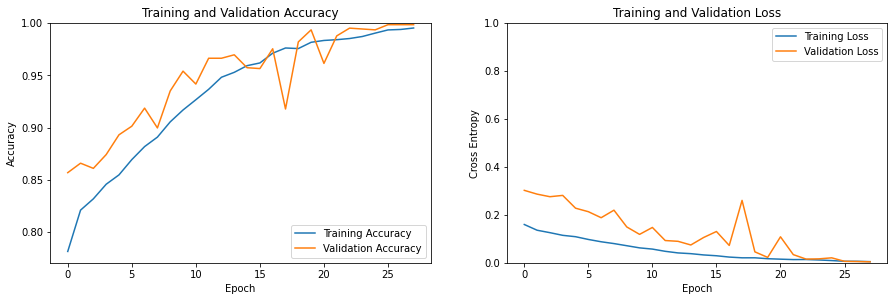

In [ ]:
#Plotting the metrics:

plt.figure(figsize=(15, 15))

#Plotting the Accuracy:
plt.subplot(3, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')

#Plotting the Loss:
plt.subplot(3, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')




#Showing all the graphs:
plt.show()

In [ ]:
valid_baseline_results = Savedmodel.evaluate(dvalid,batch_size=16, verbose=0)

val_accuracy = round((valid_baseline_results[5]),5)
val_precision = round((valid_baseline_results[6]),5)
val_recall = round((valid_baseline_results[7]),5)
val_loss = round((valid_baseline_results[0]),5)
val_auc = round((valid_baseline_results[8]),5)

print('METRIC VALUES FOR VALID DATASET : \n')
print('ACCURACY : ', val_accuracy)
print('PRECISION : ', val_precision)
print('RECALL : ', val_recall)
print('LOSS : ', val_loss)
print('AUC : ', val_auc)


METRIC VALUES FOR VALID DATASET : 

ACCURACY :  0.85892
PRECISION :  0.64392
RECALL :  0.81273
LOSS :  0.66365
AUC :  0.9057


In [ ]:
test_decoder = build_decoder(with_labels=False, target_size=(256, 256))

train_features = build_dataset(
    trainPath, bsize=BATCH_SIZE, repeat=False,
    shuffle=False, augment=False, cache=False,
    decode_fn=test_decoder
)

valid_features = build_dataset(
    validPath, bsize=BATCH_SIZE, repeat=False,
    shuffle=False, augment=False, cache=False,
    decode_fn=test_decoder
)

In [ ]:
train_features, valid_features

(<PrefetchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>,
 <PrefetchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>)

In [ ]:
valid_predictions_baseline = Savedmodel.predict(valid_features, batch_size=16)

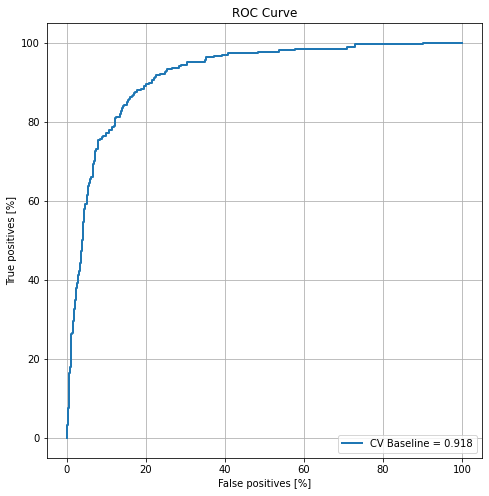

In [ ]:
def plot_roc(name, labels, predictions):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
  auc = round(metrics.auc(fp, tp),3)

  plt.figure(figsize=(8, 8))
  plt.plot(100*fp, 100*tp, label=name+" = " +str(auc), linewidth=2)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.grid(True)
  plt.title("ROC Curve")
  ax = plt.gca()
  ax.set_aspect('equal')

#Plotting the ROC Curve on CV Dataset:
plot_roc("CV Baseline", validLabels, valid_predictions_baseline)
plt.legend(loc='lower right')

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix {:.1f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  tn = cm[0][0]
  fn = cm[1][0]
  fp = cm[0][1]
  tp = cm[1][1]

  sensitivity = round((tp/(tp+fn)),3)
  specificity = round((tn/(tn+fp)),3)
  accuracy = round(((tp + tn)/(tp+tn+fp+fn)),3)
  PPV = round((tp/(tp + fp)),3)
  NPV = round((tn/(tn + fn)),3)
  print('Total Records Detected : ', labels.shape[0])
  print('Total Pneumothorax Cases : ', np.sum(cm[1]))
  print("=====================================")
  print('True Negatives : ', tn)
  print('False Positives : ', fp)
  print('False Negatives : ', fn)
  print('True Positives : ', tp)
  print("=====================================")
  print('Accuracy : ', accuracy)
  print('PPV : ', PPV)
  print('NPV : ', NPV)
  print('Sensitivity : ', sensitivity)
  print('Specificity : ', specificity)
  print("=====================================")

  return tn,fn,fp,tp,sensitivity,specificity,accuracy,PPV,NPV

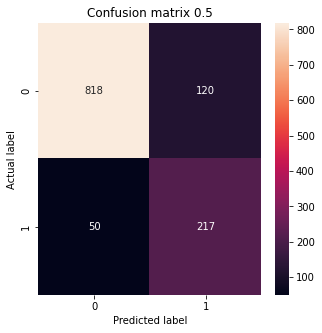

In [ ]:
tn,fn,fp,tp,sensitivity,specificity,accuracy,PPV,NPV = plot_cm(validLabels, valid_predictions_baseline)

In [ ]:
train_loss, train_acc = model.evaluate(training_set, steps=16)
dvalid,batch_size=16, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))

In [ ]:
test_df = pd.read_excel('/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Data/Files/Human detection.xlsx')
test_df.head()

,Label,Age,Sex,line/tubes,Ground truth,QC result,Physician 1,Physician 2,Size
0,DX001,68.0,M,N,NEG,NEG,Positive,Negative,NaN
1,DX002,62.0,M,N,NEG,NEG,Positive,Negative,NaN
2,DX003,67.0,F,Y,POS,POS,Positive,Negative,Large
3,DX004,68.0,M,N,NEG,NEG,Negative,Negative,NaN
4,DX005,51.0,M,Y,NEG,NEG,Negative,Negative,NaN


In [ ]:
test_df['ImagePath_jpg'] = '/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Data/Test/'+ test_df['Label']+'.jpg'

In [ ]:
imagePath_test = test_df['ImagePath_jpg']

In [ ]:
imagePath_test

0      /content/drive/MyDrive/Deep Learning Project/N...
1      /content/drive/MyDrive/Deep Learning Project/N...
2      /content/drive/MyDrive/Deep Learning Project/N...
3      /content/drive/MyDrive/Deep Learning Project/N...
4      /content/drive/MyDrive/Deep Learning Project/N...
                             ...                        
295    /content/drive/MyDrive/Deep Learning Project/N...
296    /content/drive/MyDrive/Deep Learning Project/N...
297    /content/drive/MyDrive/Deep Learning Project/N...
298    /content/drive/MyDrive/Deep Learning Project/N...
299    /content/drive/MyDrive/Deep Learning Project/N...
Name: ImagePath_jpg, Length: 300, dtype: object

In [ ]:
test_df['AI Model Prediction Probability'] = Savedmodel.predict(dtest,batch_size=16, verbose=0)

In [ ]:
test_df['AI Model Prediction'] = test_df['AI Model Prediction Probability'].apply(lambda x : 'NEG' if x < 0.5 else 'POS')

In [ ]:
test_df.head()

,Label,Age,Sex,line/tubes,Ground truth,QC result,Physician 1,Physician 2,Size,ImagePath_jpg,AI Model Prediction Probability,AI Model Prediction
0,DX001,68.0,M,N,NEG,NEG,Positive,Negative,NaN,/content/drive/MyDrive/Deep Learning Project/N...,0.960245,POS
1,DX002,62.0,M,N,NEG,NEG,Positive,Negative,NaN,/content/drive/MyDrive/Deep Learning Project/N...,0.000004,NEG
2,DX003,67.0,F,Y,POS,POS,Positive,Negative,Large,/content/drive/MyDrive/Deep Learning Project/N...,0.883043,POS
3,DX004,68.0,M,N,NEG,NEG,Negative,Negative,NaN,/content/drive/MyDrive/Deep Learning Project/N...,0.000381,NEG
4,DX005,51.0,M,Y,NEG,NEG,Negative,Negative,NaN,/content/drive/MyDrive/Deep Learning Project/N...,0.000003,NEG


In [ ]:
Resutls = test_df.to_csv (r'/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Data/Files/Results.csv', index = None, header=True)

In [ ]:
test_df['Target'] = test_df['Ground truth'].apply(lambda x : 1 if x == 'POS' else 0)
test_df.head()

,Label,Age,Sex,line/tubes,Ground truth,QC result,Physician 1,Physician 2,Size,ImagePath_jpg,Target
0,DX001,68.0,M,N,NEG,NEG,Positive,Negative,NaN,/content/drive/MyDrive/Deep Learning Project/N...,0
1,DX002,62.0,M,N,NEG,NEG,Positive,Negative,NaN,/content/drive/MyDrive/Deep Learning Project/N...,0
2,DX003,67.0,F,Y,POS,POS,Positive,Negative,Large,/content/drive/MyDrive/Deep Learning Project/N...,1
3,DX004,68.0,M,N,NEG,NEG,Negative,Negative,NaN,/content/drive/MyDrive/Deep Learning Project/N...,0
4,DX005,51.0,M,Y,NEG,NEG,Negative,Negative,NaN,/content/drive/MyDrive/Deep Learning Project/N...,0


In [ ]:
Test_Labels = test_df['Target']

In [ ]:
Test_Labels.shape

(300,)

In [ ]:
test_decoder = build_decoder(with_labels=False, target_size=(256, 256))

dtest = build_dataset(
    imagePath_test, bsize=BATCH_SIZE, repeat=False,
    shuffle=False, augment=False, cache=False,
    decode_fn=test_decoder
)

In [ ]:
test_Baseline_results = Savedmodel.predict(dtest,batch_size=16, verbose=0)

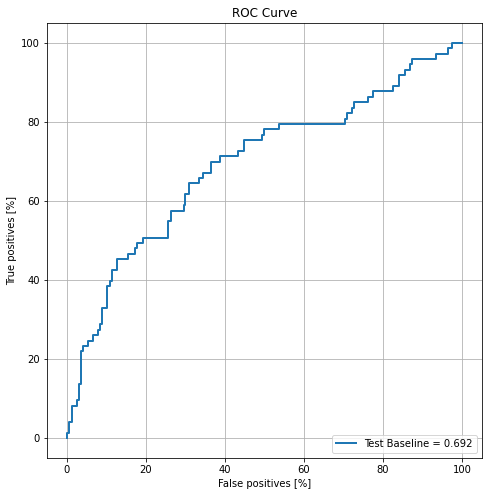

In [ ]:
def plot_roc(name, labels, predictions):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
  auc = round(metrics.auc(fp, tp),3)

  plt.figure(figsize=(8, 8))
  plt.plot(100*fp, 100*tp, label=name+" = " +str(auc), linewidth=2)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.grid(True)
  plt.title("ROC Curve")
  ax = plt.gca()
  ax.set_aspect('equal')

#Plotting the ROC Curve on Test Dataset:
plot_roc("Test Baseline", Test_Labels, test_Baseline_results)
plt.legend(loc='lower right')

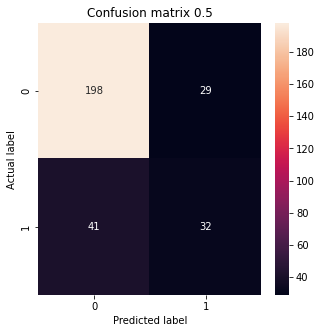

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix {:.1f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  tn = cm[0][0]
  fn = cm[1][0]
  fp = cm[0][1]
  tp = cm[1][1]

  #print('Total Records Detected : ', labels.shape[0])
  #print('Total Pneumothorax Cases : ', np.sum(cm[1]))
  return tn,fn,fp,tp,sensitivity,specificity,accuracy,PPV,NPV

tn,fn,fp,tp,sensitivity,specificity,accuracy,PPV,NPV = plot_cm(Test_Labels, test_Baseline_results)

In [ ]:
sensitivity = round((tp/(tp+fn)),3)
specificity = round((tn/(tn+fp)),3)
accuracy = round(((tp + tn)/(tp+tn+fp+fn)),3)
PPV = round((tp/(tp + fp)),3)
NPV = round((tn/(tn + fn)),3)
print("=====================================")
print('True Negatives : ', tn)
print('False Positives : ', fp)
print('False Negatives : ', fn)
print('True Positives : ', tp)
print("=====================================")
print('Accuracy : ', accuracy)
print('PPV : ', PPV)
print('NPV : ', NPV)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)
print("=====================================")

Total Records Detected :  12047


NameError: ignored

In [ ]:
def plot_precision_recall_curve(name, labels, predictions):

  class_precision, class_recall, _ = precision_recall_curve(labels, predictions)
  average_precision = round((average_precision_score(labels, predictions)),3)

  plt.figure(figsize=(8, 8))
  plt.plot(100*class_recall, 100*class_precision, label=name +" = "+ str(average_precision), linewidth=2)
  plt.xlabel('Recall [%]')
  plt.ylabel('Precision [%]')
  #plt.xlim([-0.5,20])
  #plt.ylim([80,100.5])
  plt.grid(True)
  plt.legend()
  plt.title("Precision-Recalll Curve")
  ax = plt.gca()
  ax.set_aspect('equal')

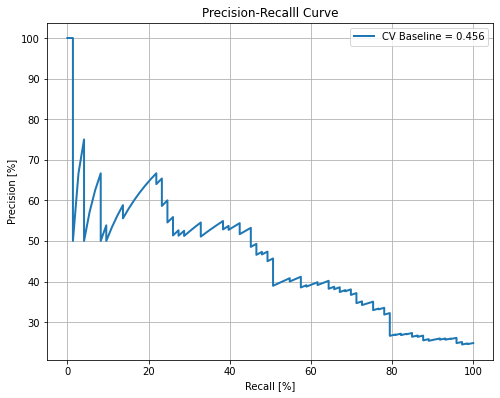

In [ ]:
plot_precision_recall_curve("CV Baseline", Test_Labels, test_Baseline_results)

SAMPLE

In [ ]:
! pip install pydicom

In [ ]:
import pydicom as dicom
import os
import cv2

os.chdir('/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Data')

folder_path = '/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Data/CXR2'

png1_folder_path = '/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Data/Png_CXR2'

PNG = True

if not os.path.exists(png1_folder_path):
    os.mkdir(png1_folder_path)

images_path = os.listdir(folder_path)
for n, image in enumerate(images_path):
    ds = dicom.dcmread(os.path.join(folder_path, image))
    pixel_array_numpy = ds.pixel_array
    if PNG == True:
        image = image.replace('.dcm', '.png')
    else:
        image = image.replace('.dcm', '.jpg')
    cv2.imwrite(os.path.join(png1_folder_path, image), pixel_array_numpy)
    if n % 50 == 0:
        print('{} image converted'.format(n))

0 image converted


In [ ]:
sample_df = pd.read_excel('/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Data/Files/Sample Results.xlsx')

In [ ]:
path = '/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Data/CXR2'

In [ ]:
file_name = []
for file in os.listdir(path):
  file_name.append(file)
file_name[:5]

In [ ]:
sample_df['Image_ID'] = file_name

In [ ]:
Image_path = []
for file in os.listdir(path):
  file_path = path + '/' + file
  Image_path.append(file_path)
Image_path

In [ ]:
sample_df['Image_Path'] = Image_path
Image_path = sample_df['Image_Path']

In [ ]:
BATCH_SIZE = 16
test_decoder = build_decoder(with_labels=False, target_size=(256, 256))

dtest = build_dataset(
    Image_path , bsize=BATCH_SIZE, repeat=False,
    shuffle=False, augment=False, cache=False,
    decode_fn=test_decoder
)

In [ ]:
Savedmodel=load_model('/content/drive/MyDrive/Deep Learning Project/Navesha Palmer/Code/FinalNet.h5')

In [ ]:
from tensorflow.keras.models import load_model

Sample_results = Savedmodel.predict(dtest,batch_size=16, verbose=0)